In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
!ls bioinfo_project/quads

durans_quad.bed  faecium_quad.bed  gilvus_quad.bed  lactis_quad.bed


In [22]:
dur = pd.read_csv('bioinfo_project/quads/durans_quad.bed', sep='\t')
dur

,durans,536477,536505,.,55,-
0,durans,1654476,1654497,.,64,+


### Посмотрим, в каких генах есть квадруплексы:

In [46]:
!bedtools intersect -a bioinfo_project/durans/genes.bed -b bioinfo_project/quads/durans_quad.bed

durans	536477	536505	-	WP_005880181.1
durans	1654476	1654497	+	WP_095443743.1


In [47]:
!bedtools intersect -a bioinfo_project/faecium/genes.bed -b bioinfo_project/quads/faecium_quad.bed

faecium	1055641	1055667	+	WP_002298128.1


In [ ]:
!bedtools intersect -a bioinfo_project/gilvus/genes.bed -b bioinfo_project/quads/gilvus_quad.bed

In [52]:
!bedtools intersect -a bioinfo_project/lactis/genes.bed -b bioinfo_project/quads/lactis_quad.bed

lactis	719618	719646	+	WP_002377053.1
lactis	1616082	1616108	-	WP_002290190.1
lactis	2249466	2249492	-	WP_002291388.1


### Посмотрим, у каких организмов есть квадруплексы в промотерах:

In [25]:
!bedtools intersect -a bioinfo_project/durans/res.bed -b bioinfo_project/quads/durans_quad.bed

In [26]:
!bedtools intersect -a bioinfo_project/faecium/res.bed -b bioinfo_project/quads/faecium_quad.bed

faecium	1055641	1055643	WP_002298128.1


In [27]:
!bedtools intersect -a bioinfo_project/gilvus/res.bed -b bioinfo_project/quads/gilvus_quad.bed

gilvus	420303	420324	WP_114524015.1
gilvus	420303	420324	WP_114525691.1


In [28]:
!bedtools intersect -a bioinfo_project/lactis/res.bed -b bioinfo_project/quads/lactis_quad.bed

lactis	719618	719646	WP_002377053.1
lactis	1616104	1616108	WP_002290190.1


### к каким кластерам принадлежат полученные гены:

In [54]:
d = ['WP_005880181.1', 'WP_095443743.1']
f = ['WP_002298128.1']
g = ['WP_114524015.1', 'WP_114525691.1']
l = ['WP_002377053.1', 'WP_002290190.1', 'WP_002291388.1']

In [81]:
ortho['durans'] = pd.Series(ortho['durans_protein.faa']).str.contains(d[0], regex=False) + \
pd.Series(ortho['durans_protein.faa']).str.contains(d[1], regex=False)

ortho['faecium'] = pd.Series(ortho['faecium_protein.faa']).str.contains(f[0], regex=False)

ortho['gilvus'] = pd.Series(ortho['gilvus_protein.faa']).str.contains(g[0], regex=False) + \
pd.Series(ortho['gilvus_protein.faa']).str.contains(g[1], regex=False) 

ortho['lactis'] = pd.Series(ortho['lactis_protein.faa']).str.contains(l[0], regex=False) + \
pd.Series(ortho['lactis_protein.faa']).str.contains(l[1], regex=False) + \
pd.Series(ortho['lactis_protein.faa']).str.contains(l[2], regex=False)

ortho['sum'] = ortho['durans'].astype(int) + ortho['faecium'].astype(int) + \
                                        ortho['gilvus'].astype(int) + ortho['lactis'].astype(int)
ortho

,# Species,Genes,Alg.-Conn.,durans_protein.faa,faecium_protein.faa,gilvus_protein.faa,lactis_protein.faa,raffinosus_protein.faa,durans,faecium,gilvus,lactis,sum
0,2,6,0.165,*,"WP_000222572.1,WP_002287760.1,WP_060797334.1,W...",*,WP_138302659.1,*,False,False,False,False,0
1,2,9,0.104,*,*,"WP_114525461.1,WP_114525879.1",*,"WP_010745182.1,WP_028021004.1,WP_060789356.1,W...",False,False,False,False,0
2,2,6,0.104,*,*,"WP_044926420.1,WP_114525814.1,WP_114525881.1",*,"WP_028020996.1,WP_218256849.1,WP_010745184.1",False,False,False,False,0
3,2,7,0.282,*,"WP_044382644.1,WP_138013243.1",*,"WP_002329247.1,WP_002335471.1,WP_002342382.1,W...",*,False,False,False,False,0
4,3,5,0.115,WP_095444013.1,"WP_060808624.1,WP_156264901.1","WP_114524789.1,WP_114524305.1",*,*,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,2,2,1.000,WP_081133574.1,*,*,*,WP_010745412.1,False,False,False,False,0
3563,2,2,1.000,WP_081135508.1,*,WP_067624262.1,*,*,False,False,False,False,0
3564,2,2,1.000,*,WP_010729268.1,WP_071857945.1,*,*,False,False,False,False,0
3565,2,2,1.000,WP_095444022.1,*,*,WP_086314901.1,*,False,False,False,False,0


### В одном кластере оказывается не больше двух генов (почти во всех кластерах - ни одного)

In [82]:
ortho['sum'].max()

2

In [83]:
ortho.loc[ortho['sum'] != 0]

,# Species,Genes,Alg.-Conn.,durans_protein.faa,faecium_protein.faa,gilvus_protein.faa,lactis_protein.faa,raffinosus_protein.faa,durans,faecium,gilvus,lactis,sum
111,2,3,0.328,"WP_005880181.1,WP_081134106.1",*,*,WP_002329562.1,*,True,False,False,False,1
231,2,2,1.000,*,*,WP_114524015.1,*,WP_218256804.1,False,False,True,False,1
1654,2,2,1.000,*,*,WP_114525691.1,*,WP_028021316.1,False,False,True,False,1
2193,5,5,0.952,WP_179135143.1,WP_002298128.1,WP_114524236.1,WP_002290190.1,WP_218257182.1,False,True,False,True,2
2356,5,5,0.922,WP_005877306.1,WP_002293644.1,WP_044926427.1,WP_002291388.1,WP_218257331.1,False,False,False,True,1
3469,4,4,0.177,WP_095443743.1,WP_002286055.1,WP_114524963.1,*,WP_010745429.1,True,False,False,False,1


In [109]:
!head -n2 bioinfo_project/orthologs/*2193*

>WP_218257182.1 ATP-binding cassette domain-containing protein [Enterococcus raffinosus]
MKELKVTELYKTFGDKTLFDRISFLIHEKDRIGLIGVNGTGKSSLLTILAGKDSGDGDISAIEKASDYRIGYLAQEQNFS


### Bизуализация:

In [84]:
from dna_features_viewer import GraphicFeature, GraphicRecord

In [92]:
table = pd.read_csv('bioinfo_project/lactis/genes.bed', sep='\t', names=['1','2','3','4','5'])
table['len'] = table['3'] - table['2']
table.loc[table['5'] == 'WP_002290190.1']

,1,2,3,4,5,len
1510,lactis,1614321,1616204,-,WP_002290190.1,1883


In [93]:
!head bioinfo_project/quads/lac*

lactis	719618	719646	.	55	+
lactis	1616082	1616108	.	57	-
lactis	2249466	2249492	.	57	-


In [95]:
1616108 - 1614321

1787

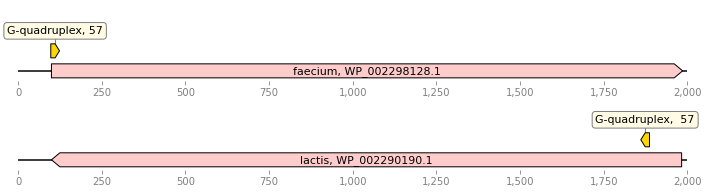

In [101]:
#  cluster 1

fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1,figsize=(12, 3))

features=[
    GraphicFeature(start=98, end=124, strand=+1, color="#ffd700",
                   label="G-quadruplex, 57"),
    GraphicFeature(start=100, end=1986, strand=+1, color="#ffcccc",
                   label="faecium, WP_002298128.1"),

]
record = GraphicRecord(sequence_length=2000, features=features)
_=record.plot(ax=ax1)

features=[
    GraphicFeature(start=1861, end=1887, strand=-1, color="#ffd700",
                   label="G-quadruplex,  57"),
    GraphicFeature(start=100, end=1983, strand=-1, color="#ffcccc",
                   label="lactis, WP_002290190.1"),

]
record = GraphicRecord(sequence_length=2000, features=features)
_=record.plot(ax=ax2)

